In [1187]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px
# pip install html5lib,beautifulsoup4

In [1188]:
url = 'https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/loans.csv'
df = pd.read_csv(url)
df.shape

(9578, 14)

In [1189]:
df.head()

,credit.policy,loan_purpose,int.rate,installment,log.annual.inc,debt_to_income,fico,days.with.cr.line,revol.bal,revol.util,recent_inq.last.6mths,delinquent.2yrs,bad_public_record,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [1190]:
df['delinquent.2yrs'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  5.,  6., nan, 13.,  7.,  8., 11.])

In [1191]:
skewness_before=df.skew(numeric_only=True)

In [1192]:
df['log.annual.inc'].fillna(df['log.annual.inc'].mean(),inplace=True)
df['days.with.cr.line'].fillna(df['days.with.cr.line'].median(),inplace=True)
df['revol.util'].fillna(df['revol.util'].mean(),inplace=True)
df['recent_inq.last.6mths'].fillna(df['recent_inq.last.6mths'].median(),inplace=True)
df['delinquent.2yrs'].fillna(df['delinquent.2yrs'].median(),inplace=True)
df['bad_public_record'].fillna(df['bad_public_record'].median(),inplace=True)

In [1193]:
skewness_after = df.skew(numeric_only=True)

In [1194]:
print(skewness_before)
print(skewness_after)

credit.policy            -1.539621
int.rate                  0.164420
installment               0.912522
log.annual.inc            0.028703
debt_to_income            0.023941
fico                      0.471260
days.with.cr.line         1.157578
revol.bal                11.161058
revol.util                0.058099
recent_inq.last.6mths     3.604803
delinquent.2yrs           6.061788
bad_public_record         5.131172
not.fully.paid            1.854592
dtype: float64
credit.policy            -1.539621
int.rate                  0.164420
installment               0.912522
log.annual.inc            0.028709
debt_to_income            0.023941
fico                      0.471260
days.with.cr.line         1.160707
revol.bal                11.161058
revol.util                0.058288
recent_inq.last.6mths     3.611475
delinquent.2yrs           6.071153
bad_public_record         5.139760
not.fully.paid            1.854592
dtype: float64


In [1195]:
nums=[]
for col in df.columns:
    if not (col =="loan_purpose" or col == 'not.fully.paid' or col == 'bad_public_record' or col =='credit.policy'):
        nums.append(col)
cats=['not.fully.paid','bad_public_record','credit.policy','loan_purpose']
nums

['int.rate',
 'installment',
 'log.annual.inc',
 'debt_to_income',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'recent_inq.last.6mths',
 'delinquent.2yrs']

In [1196]:
nums=[]
for col in df.columns:
    if not (col =="loan_purpose" or col == 'not.fully.paid' or col == 'bad_public_record' or col =='credit.policy' or col == 'delinquent.2yrs'):
        nums.append(col)
cats=['not.fully.paid','bad_public_record','credit.policy','loan_purpose']
nums


['int.rate',
 'installment',
 'log.annual.inc',
 'debt_to_income',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'recent_inq.last.6mths']

In [1197]:

for col in nums:
    threshold = 0.97
    thresh = df[col].quantile(threshold)
    df[col][df[col]>thresh]=thresh

C:\Users\Vikram k m\AppData\Local\Temp\ipykernel_17736\458451804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col]>thresh]=thresh
C:\Users\Vikram k m\AppData\Local\Temp\ipykernel_17736\458451804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col]>thresh]=thresh
C:\Users\Vikram k m\AppData\Local\Temp\ipykernel_17736\458451804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col]>thresh]=th

In [1198]:
df.skew(numeric_only=True)

credit.policy           -1.539621
int.rate                -0.016311
installment              0.859735
log.annual.inc          -0.358181
debt_to_income          -0.033641
fico                     0.393507
days.with.cr.line        0.730574
revol.bal                2.126900
revol.util               0.042980
recent_inq.last.6mths    1.455996
delinquent.2yrs          6.071153
bad_public_record        5.139760
not.fully.paid           1.854592
dtype: float64

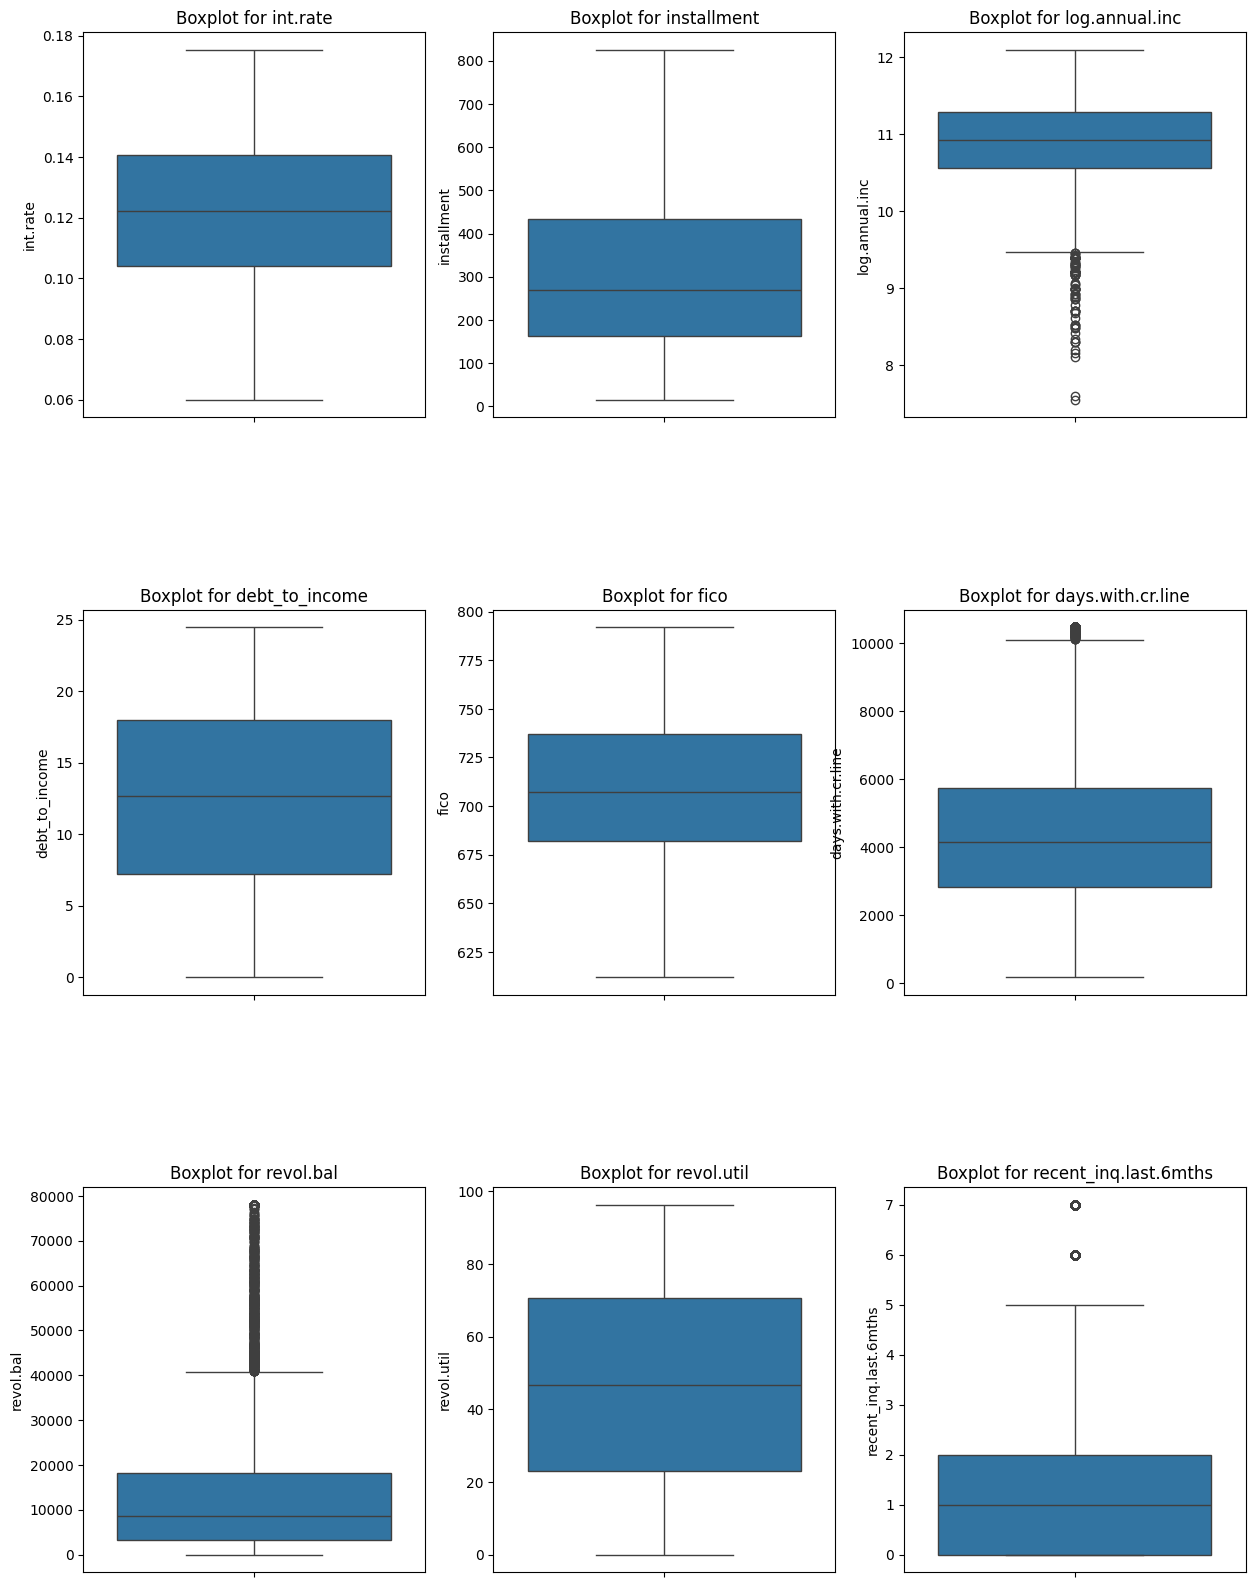

In [1199]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 20), sharex = True)
fig.subplots_adjust(hspace = 0.5)


for i, col in enumerate(nums):
    ax = plt.subplot(3, 3, i+1)
    sn.boxplot(y = df[col])
    ax.set_title(f"Boxplot for {col}")
plt.show()

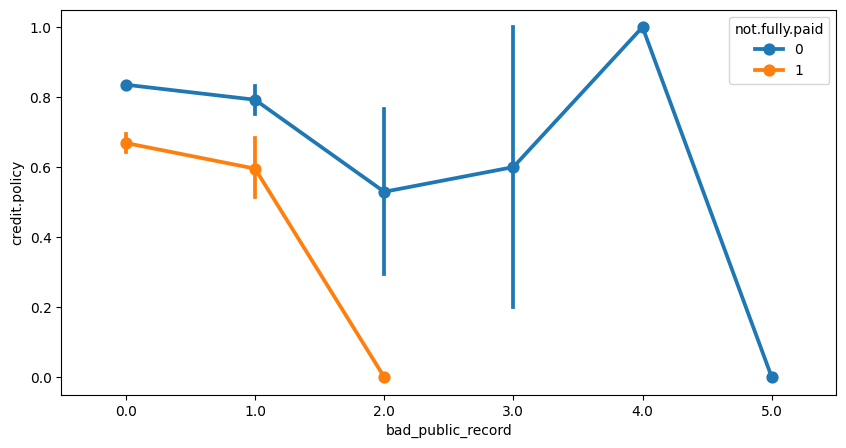

In [1200]:
plt.figure(figsize=(10,5))
sn.pointplot(x='bad_public_record',y='credit.policy',hue='not.fully.paid',data=df)
plt.show()

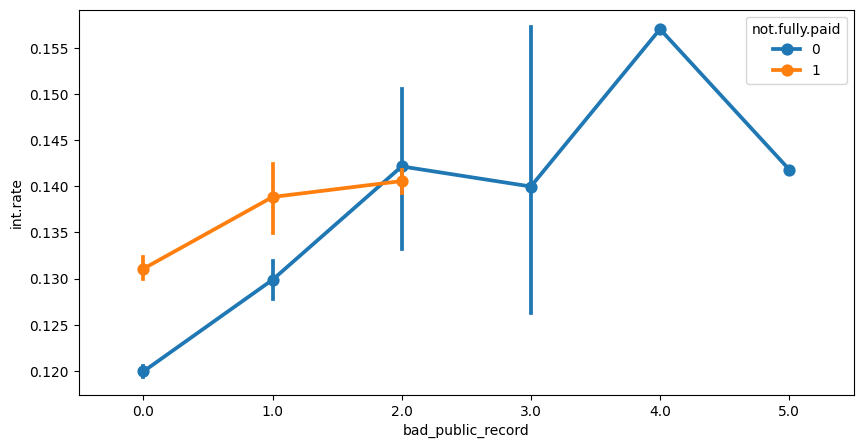

In [1201]:
plt.figure(figsize=(10,5))
sn.pointplot(x='bad_public_record',y='int.rate',hue='not.fully.paid',data=df)
plt.show()

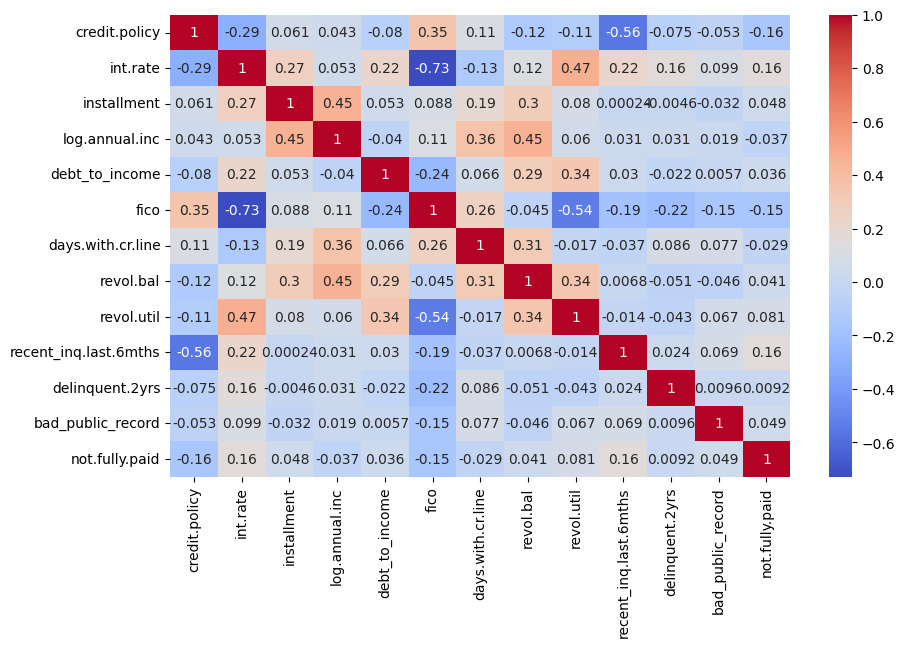

In [1202]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sn.heatmap(corr,annot=True,cmap='coolwarm')   
plt.show()

In [1203]:
x=df[['int.rate','fico','loan_purpose','recent_inq.last.6mths','bad_public_record','revol.util']]
y=df['not.fully.paid']

In [1204]:
x.head()

,int.rate,fico,loan_purpose,recent_inq.last.6mths,bad_public_record,revol.util
0,0.1189,737,debt_consolidation,0.0,0.0,52.1
1,0.1071,707,credit_card,0.0,0.0,76.7
2,0.1357,682,debt_consolidation,1.0,0.0,25.6
3,0.1008,712,debt_consolidation,1.0,0.0,73.2
4,0.1426,667,credit_card,0.0,0.0,39.5


In [1205]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [1206]:
pipeline = ColumnTransformer([("defaulter",OneHotEncoder(drop='first'),[2]),("sc",StandardScaler(),[0,1,3,4,5])],remainder='passthrough')
pipeline.fit(x)

ColumnTransformer(remainder='passthrough',
                  transformers=[('defaulter', OneHotEncoder(drop='first'), [2]),
                                ('sc', StandardScaler(), [0, 1, 3, 4, 5])])

In [1207]:
x2 = pipeline.transform(x)
pd.DataFrame(x2,columns=pipeline.get_feature_names_out()).head()

,defaulter__loan_purpose_credit_card,defaulter__loan_purpose_debt_consolidation,defaulter__loan_purpose_educational,defaulter__loan_purpose_home_improvement,defaulter__loan_purpose_major_purchase,defaulter__loan_purpose_small_business,sc__int.rate,sc__fico,sc__recent_inq.last.6mths,sc__bad_public_record,sc__revol.util
0,0.0,1.0,0.0,0.0,0.0,0.0,-0.130338,0.707942,-0.838240,-0.236522,0.184137
1,1.0,0.0,0.0,0.0,0.0,0.0,-0.583902,-0.095772,-0.838240,-0.236522,1.038315
2,0.0,1.0,0.0,0.0,0.0,0.0,0.515413,-0.765534,-0.273676,-0.236522,-0.736014
3,0.0,1.0,0.0,0.0,0.0,0.0,-0.826059,0.038180,-0.273676,-0.236522,0.916785
4,1.0,0.0,0.0,0.0,0.0,0.0,0.780633,-1.167392,-0.838240,-0.236522,-0.253369


In [1208]:
from sklearn.model_selection import train_test_split

In [1209]:
xtr,xts,ytr,yts = train_test_split(x2,y,test_size=0.3,random_state=3)
print(x.shape,xtr.shape,xts.shape)
print(y.shape,ytr.shape,yts.shape)

(9578, 6) (6704, 11) (2874, 11)
(9578,) (6704,) (2874,)


In [1210]:
from sklearn.linear_model import LogisticRegression

In [1211]:
model = LogisticRegression()
# train the model with train data
model.fit(xtr,ytr)

LogisticRegression()

In [1212]:
person = [[0.1189,737,'debt_consolidation',7.218033,0,52.1]]
person = pipeline.transform(person)
model.predict(person)
model.predict_proba(person)

C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.77145129, 0.22854871]])

In [1213]:
ypred = model.predict(xts)

In [1214]:
from sklearn import metrics

In [1]:
from sklearn.metrics import make_scorer, recall_score,confusion_matrix,classification_report

In [1215]:
def get_performance(model,xts,yts):
    ypred = model.predict(xts)
    print("Accuracy ",metrics.accuracy_score(yts,ypred))
    print("Confusion Matrix ") 
    print(metrics.confusion_matrix(yts,ypred))
    print("Recall ",metrics.recall_score(yts,ypred))
    print("Precision ",metrics.precision_score(yts,ypred))
    print("F1 Score ",metrics.f1_score(yts,ypred))
get_performance(model,xts,yts)

Accuracy  0.8434237995824635
Confusion Matrix 
[[2422    6]
 [ 444    2]]
Recall  0.004484304932735426
Precision  0.25
F1 Score  0.008810572687224669


In [1216]:
from sklearn import tree

In [1217]:
model4 = tree.DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       max_features='log2', min_samples_leaf=21,
                       min_samples_split=45)

model4.fit(xtr,ytr)
get_performance(model4,xts,yts)

Accuracy  0.5375782881002088
Confusion Matrix 
[[1257 1171]
 [ 158  288]]
Recall  0.6457399103139013
Precision  0.1973954763536669
F1 Score  0.30236220472440944


In [1218]:
print("Performance of model on test data")
get_performance(model4,xts,yts)
print("###############"*5)
print("Performance of model on train data")
get_performance(model4,xtr,ytr)

Performance of model on test data
Accuracy  0.5375782881002088
Confusion Matrix 
[[1257 1171]
 [ 158  288]]
Recall  0.6457399103139013
Precision  0.1973954763536669
F1 Score  0.30236220472440944
###########################################################################
Performance of model on train data
Accuracy  0.5366945107398569
Confusion Matrix 
[[2860 2757]
 [ 349  738]]
Recall  0.6789328426862925
Precision  0.2111587982832618
F1 Score  0.3221300742034046


In [1219]:
param_grid = {"criterion":['gini','entropy'],
              "max_depth":np.arange(3,15,1),
              "min_samples_leaf":np.arange(5,30,2),
              "min_samples_split":np.arange(10,50,5),
              'max_features': ['auto', 'sqrt', 'log2', None],
              # 'max_features': ['sqrt', 'log2', None],
              }
param_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'min_samples_leaf': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
 'min_samples_split': array([10, 15, 20, 25, 30, 35, 40, 45]),
 'max_features': ['auto', 'sqrt', 'log2', None]}

In [1220]:
from sklearn.model_selection import GridSearchCV

In [1221]:
search = GridSearchCV(tree.DecisionTreeClassifier(class_weight='balanced'),param_grid=param_grid,cv=5,scoring='precision',verbose=True,n_jobs=-1)
search.fit(x2,y)
search.best_params_
search.best_score_

In [1222]:
# print(search.best_estimator_)

In [1223]:
from sklearn import tree

In [1224]:
model7= tree.DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       max_features='sqrt', min_samples_leaf=21,
                       min_samples_split=45)
model7.fit(xtr,ytr)

model8 = tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features='sqrt', min_samples_leaf=11,
                       min_samples_split=40)
model8.fit(xtr,ytr)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features='sqrt', min_samples_leaf=11,
                       min_samples_split=40)

In [1225]:
get_performance(model7,xts,yts)

Accuracy  0.6757132915796799
Confusion Matrix 
[[1718  710]
 [ 222  224]]
Recall  0.5022421524663677
Precision  0.2398286937901499
F1 Score  0.32463768115942027


In [1226]:
get_performance(model8,xts,yts)

Accuracy  0.7118997912317327
Confusion Matrix 
[[1852  576]
 [ 252  194]]
Recall  0.4349775784753363
Precision  0.2519480519480519
F1 Score  0.319078947368421


In [1227]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=250)
RFC.fit(xtr,ytr)

RandomForestClassifier(n_estimators=250)

In [1228]:
y_pred=RFC.predict(xts)

In [1229]:
print(confusion_matrix(yts,y_pred))

[[2363   65]
 [ 415   31]]


In [1230]:
print(classification_report(yts,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2428
           1       0.32      0.07      0.11       446

    accuracy                           0.83      2874
   macro avg       0.59      0.52      0.51      2874
weighted avg       0.77      0.83      0.78      2874

